# Data Analysis

## Step 0.
The goal of *Health & Wealth: An interactive study on obesity and cardiovascular disease* is to investigate the statistical connections between obesity prevalence, cardiovascular disease prevalence, gross domestic product (GDP) per capita, and life expectancy across many countries. The project seeks to employ statistical analysis and interactive visualizations (i.e. bubble, line, and pie charts) to observe how obesity and cardiovascular disease prevalence statistically relate to health and wealth globally. The project also intends to observe the possible correlation between obesity and cardiovascular disease.

## Step 1.
Note that this step describes the dataset with missing values.

#### Size of datasets:
The dataset for *Health & Wealth* contains 5049 rows and 7 columns.

#### Column names:
The column names are country, countryCode, year, obesityPrev, cardioPrev, lifeExp, and gdpPcap.

#### Column classification:
country and countryCode are nominal categorical variables; year is a discrete quantitative variable; obesityPrev, cardioPrev, lifeExp, and gdpPcap are continuous quantitative variables.

#### List of discrete values for categorical variables:
The discrete values for the country categorical variable are 0, 1, ..., 186 because a total of 187 countries are represented by the data set. For the same reason, the countryCode categorical variable has discrete values 0, 1, ..., 186.

#### Distribution of discrete values for categorical variables:
Since neither country nor countryCode is ordinal, the distributions of discrete values for categorical variables in this dataset is not statistically meaningful. In particular, neither country nor countryCode has a mode because every country is represented 27 times (once for every year from 1990 to 2016) in the dataset.

#### Distribution of quantitative variables (range, median, mean, sd, units):
year has a range of 26, a median of 2003, a mean of 2003, a standard deviation of 7.789652, and is of the unit year. 

obesityPrev has a range of 60.400000, a median of 13.700000, a mean of 14.165241, a standard deviation of 9.949573, and is of the unit percent (of adult population with Body Mass Index above 30).

cardioPrev has a range of 5.189966, a median of 6.574420, a mean of	6.586834, a standard deviation of 0.948350, and is of the unit cases (of cardiovascular disease per 100,000 people).

lifeExp has a range of 69.886878, a median of 69.784390, a mean of 67.500368, a standard deviation of 9.543888, and is of the unit years.

gdpPcap has a range of 123655.851729, a median of 2840.609273, a mean of 9045.890562, a standard deviation of 14718.832425, and is of the unit U.S. dollars (current).

In [101]:
# Import packages
import numpy as np
import pandas as pd

# Load CSV files
df = pd.read_csv('health_wealth.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5049 non-null   object 
 1   countryCode  5049 non-null   object 
 2   year         5049 non-null   int64  
 3   obesityPrev  5049 non-null   float64
 4   cardioPrev   5049 non-null   float64
 5   lifeExp      4999 non-null   float64
 6   gdpPcap      4854 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 276.2+ KB


In [2]:
# Determine discrete values for categorical variables
unique_country = df['country'].unique()
unique_countryCode = df['countryCode'].unique()
discrete_values = df['country'].value_counts()

print("unique_country:", len(unique_country))
print("unique_countryCode:", len(unique_countryCode))
print(discrete_values)

unique_country: 187
unique_countryCode: 187
country
Afghanistan    27
Oman           27
Nepal          27
Netherlands    27
New Zealand    27
               ..
Georgia        27
Germany        27
Ghana          27
Greece         27
Zimbabwe       27
Name: count, Length: 187, dtype: int64


In [3]:
# Distribution of quantitative variables
quant_df = df[['year', 'obesityPrev', 'cardioPrev', 'lifeExp', 'gdpPcap']]

quant_summary_df = pd.DataFrame({'range': quant_df.max() - quant_df.min(),'median': quant_df.median(),
                                 'mean': quant_df.mean(), 'standard deviation': quant_df.std()})

quant_summary_df

,range,median,mean,standard deviation
year,26.000000,2003.000000,2003.000000,7.789652
obesityPrev,60.400000,13.700000,14.165241,9.949573
cardioPrev,5.189966,6.574420,6.586834,0.948350
lifeExp,69.886878,69.784390,67.500368,9.543888
gdpPcap,123655.851729,2840.609273,9045.890562,14718.832425


# Step 2.
The dataset is missing only quantitative data—50 values for lifeExp and 195 values for gdpPcap. The countries missing data are Afghanistan, Andorra, Belarus, Bosnia and Herzegovina, Cambodia, Croatia, Democratic Republic of Congo, East Timor, Eritrea, Estonia, Hungary, Iran, Israel, Latvia, Liberia, Lithuania, Moldova, Montenegro, Mozambique, Nauru, North Korea, Palau, Sao Tome and Principe, Serbia, Slovenia, Somalia, and Venezuela.

Life expectancy and GDP per capita tend to fluctuate over time as countries experience economic, infrastructural, and political upturns or downturns. Since lifeExp and gdpPcap exhibit temporal dependency, means are unsuitable for replacing their missing values.

To replace missing lifeExpectancy and gdpPcap data, forward fill followed by backward fill with limits of 5 are applied within each country. This is done with the reasonable assumption that life expectancy and GDP per capita do not usually change dramatically in 5 years.

Following the filling procedure, 38 lifeExpectancy and 99 gdpPcap values remain missing. The 137 rows with these remaining missing data, displayed below in Table 1, are removed because there are neither enough values before nor after each row to use for value replacement. The countries from which some data is dropped are Afghanistan, Andorra, East Timor, Eritrea, Liberia, Montenegro, Nauru, North Korea, Palau, Sao Tome and Principe, Somalia, and Venezuela.

After dealing with missing data, the ranges for year, obesityPrev, cardioPrev, lifeExp, and gdpPcap are 26, 60.400000, 5.189966, 69.886878, and 123655.851729 respectively. These ranges are correct because they are nonnegative and the same as prior to filling and dropping missing values. The modified data in the correct format as country and countryCode are of object datatype, year is of int64 datatype, and obesityPrev, cardioPrev, lifeExp, and gdpPcap are of float64 datatype. There is no duplicate data.

In [90]:
# Find missing data
missing_data_df = df.isnull()

missing_rows_df = df[missing_data_df.any(axis=1)]
print(df.isnull().sum())
missing_rows_df

country          0
countryCode      0
year             0
obesityPrev      0
cardioPrev       0
lifeExp         50
gdpPcap        195
dtype: int64


,country,countryCode,year,obesityPrev,cardioPrev,lifeExp,gdpPcap
0,Afghanistan,AFG,1990,1.0,8.160259,45.967,NaN
1,Afghanistan,AFG,1991,1.1,8.169889,46.663,NaN
2,Afghanistan,AFG,1992,1.2,8.180185,47.596,NaN
3,Afghanistan,AFG,1993,1.2,8.185960,51.466,NaN
4,Afghanistan,AFG,1994,1.3,8.191086,51.495,NaN
...,...,...,...,...,...,...,...
4205,Somalia,SOM,2010,5.4,6.366282,50.563,NaN
4206,Somalia,SOM,2011,5.6,6.366025,51.304,NaN
4207,Somalia,SOM,2012,5.9,6.362291,53.161,NaN
4939,Venezuela,VEN,2015,24.7,4.420040,73.006,NaN


In [7]:
# Make a new dataframe with missing values filled

## Sort the dataframe by the 'country' column
df_sorted = df.sort_values(by=['country', 'year'])

## Apply forward fill with a limit of 10, only within the same country
df_filled = df_sorted.groupby('country').ffill(limit=5)

## Apply backward fill with a limit of 10, only within the same country
df_filled = df_sorted.groupby('country').bfill(limit=5)

## Add the country column back
df_filled = df[['country', 'countryCode', 'year']].merge(df_filled, on=['countryCode', 'year'], how='inner')

df_filled

,country,countryCode,year,obesityPrev,cardioPrev,lifeExp,gdpPcap
0,Afghanistan,AFG,1990,1.0,8.160259,45.967,NaN
1,Afghanistan,AFG,1991,1.1,8.169889,46.663,NaN
2,Afghanistan,AFG,1992,1.2,8.180185,47.596,NaN
3,Afghanistan,AFG,1993,1.2,8.185960,51.466,NaN
4,Afghanistan,AFG,1994,1.3,8.191086,51.495,NaN
...,...,...,...,...,...,...,...
5044,Zimbabwe,ZWE,2012,11.1,6.511165,55.626,1290.193957
5045,Zimbabwe,ZWE,2013,11.3,6.499161,57.458,1408.367810
5046,Zimbabwe,ZWE,2014,11.6,6.488806,58.846,1407.034291
5047,Zimbabwe,ZWE,2015,11.9,6.480646,59.591,1410.329173


#### Table 1

In [93]:
# Find remaining missing data
print(df_filled.isnull().sum())

missing_data_df_filled = df_filled.isnull()

missing_rows_df_filled = df[missing_data_df_filled.any(axis=1)]

missing_rows_df_filled.to_csv('health_wealth_dropped.csv')
missing_rows_df_filled

country         0
countryCode     0
year            0
obesityPrev     0
cardioPrev      0
lifeExp        38
gdpPcap        99
dtype: int64


,country,countryCode,year,obesityPrev,cardioPrev,lifeExp,gdpPcap
0,Afghanistan,AFG,1990,1.0,8.160259,45.967,NaN
1,Afghanistan,AFG,1991,1.1,8.169889,46.663,NaN
2,Afghanistan,AFG,1992,1.2,8.180185,47.596,NaN
3,Afghanistan,AFG,1993,1.2,8.185960,51.466,NaN
4,Afghanistan,AFG,1994,1.3,8.191086,51.495,NaN
...,...,...,...,...,...,...,...
4200,Somalia,SOM,2005,4.4,6.404432,50.661,NaN
4201,Somalia,SOM,2006,4.6,6.397453,50.597,NaN
4202,Somalia,SOM,2007,4.8,6.388596,50.515,NaN
4939,Venezuela,VEN,2015,24.7,4.420040,73.006,NaN


In [10]:
# Make a new dataframe with missing values dropped
df_new = df_filled.dropna()

df_new

,country,countryCode,year,obesityPrev,cardioPrev,lifeExp,gdpPcap
7,Afghanistan,AFG,1997,1.6,8.208111,53.634,182.174037
8,Afghanistan,AFG,1998,1.7,8.218942,52.943,182.174037
9,Afghanistan,AFG,1999,1.8,8.225671,54.846,182.174037
10,Afghanistan,AFG,2000,1.9,8.229315,55.298,182.174037
11,Afghanistan,AFG,2001,2.0,8.224417,55.798,182.174037
...,...,...,...,...,...,...,...
5044,Zimbabwe,ZWE,2012,11.1,6.511165,55.626,1290.193957
5045,Zimbabwe,ZWE,2013,11.3,6.499161,57.458,1408.367810
5046,Zimbabwe,ZWE,2014,11.6,6.488806,58.846,1407.034291
5047,Zimbabwe,ZWE,2015,11.9,6.480646,59.591,1410.329173


In [11]:
# Check that data has expected range
quant_df_new = df_new[['year', 'obesityPrev', 'cardioPrev', 'lifeExp', 'gdpPcap']]

quant_range_df_new = pd.DataFrame({'range': quant_df.max() - quant_df.min()})

print('Ranges after dealing with missing data: \n', quant_range_df_new)

print('\nRanges before dealing with missing data: \n', quant_summary_df['range'])

Ranges after dealing with missing data: 
                      range
year             26.000000
obesityPrev      60.400000
cardioPrev        5.189966
lifeExp          69.886878
gdpPcap      123655.851729

Ranges before dealing with missing data: 
 year               26.000000
obesityPrev        60.400000
cardioPrev          5.189966
lifeExp            69.886878
gdpPcap        123655.851729
Name: range, dtype: float64


In [12]:
# Check that data has correct format
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4912 entries, 7 to 5048
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      4912 non-null   object 
 1   countryCode  4912 non-null   object 
 2   year         4912 non-null   int64  
 3   obesityPrev  4912 non-null   float64
 4   cardioPrev   4912 non-null   float64
 5   lifeExp      4912 non-null   float64
 6   gdpPcap      4912 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 307.0+ KB


In [13]:
# Check if data has duplicates
df_new.duplicated()

7       False
8       False
9       False
10      False
11      False
        ...  
5044    False
5045    False
5046    False
5047    False
5048    False
Length: 4912, dtype: bool

# Step 3.

The Pearson correlation coefficient among qualitative data is displayed below in Table 2. The correlation coefficient is high (above 0.5) between lifeExp and obesityPrev at 0.569286, and between lifeExp and gdpPcap at 0.573077. As shown in Graph 1, the relationship between lifeExp and obesityPrev can be fit linearly with $$\ obesityPrev = 0.5761 \times lifeExp - 24.94,$$ quadratically with $$\ obesityPrev = 0.002497 \times lifeExp^2 + 0.2553 \times lifeExp - 14.89,$$ and cubically with $$\ obesityPrev = -0.0003307 \times lifeExp^3 + 0.06413 \times lifeExp^2 - 3.495 \times lifeExp + 59.43.$$ The best fit for lifeExp and obesityPrev is cubic, as it has the highest R-squared value.

Similarly, as shown in Graph 2, the relationship between lifeExp and gdpPcap can be fit linearly with $$\ gdpPcap = 882.1 \times lifeExp - 50890,$$ quadratically with $$\ gdpPcap = 66.34 \times lifeExp^2 - 7643 \times lifeExp + 216300,$$ and cubically with $$\ gdpPcap = 2.215 \times lifeExp^3 - 346.4 \times lifeExp^2 + 17480 \times lifeExp - 281500.$$ The best fit for lifeExp and gdpPcap is cubic, as it has the highest R-squared value.

#### Table 2

In [96]:
# Check for correlation among quantitative columns
correlation_matrix = quant_df_new.corr(method='pearson')

correlation_matrix.to_csv('health_wealth_corr.csv')
correlation_matrix

,year,obesityPrev,cardioPrev,lifeExp,gdpPcap
year,1.000000,0.309993,-0.049672,0.228291,0.212192
obesityPrev,0.309993,1.000000,0.198029,0.569286,0.365642
cardioPrev,-0.049672,0.198029,1.000000,-0.003635,-0.060659
lifeExp,0.228291,0.569286,-0.003635,1.000000,0.573077
gdpPcap,0.212192,0.365642,-0.060659,0.573077,1.000000


#### Graph 1

 
0.5761 x - 24.94
          2
0.002497 x + 0.2553 x - 14.89
            3           2
-0.0003307 x + 0.06413 x - 3.495 x + 59.43


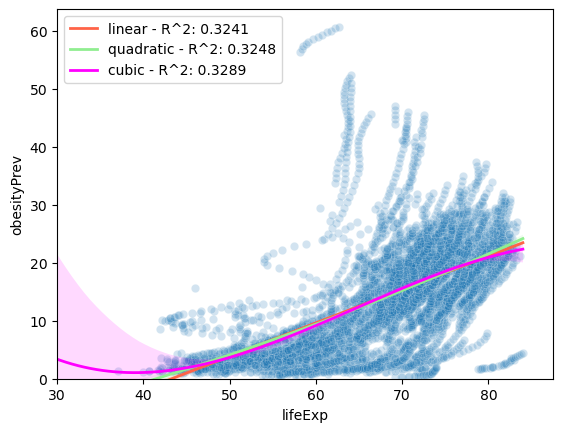

In [98]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Scatterplot for lifeExp vs. obesityPrev
sns.scatterplot(data=df_new, x="lifeExp", y="obesityPrev", alpha=0.2)
plt.xlim(30)
plt.ylim(0)

# Define polynomial orders
orders = [1, 2, 3]
models = ['linear', 'quadratic', 'cubic']
colors = ['tomato', 'lightgreen', 'magenta']

# Iterate through polynomial orders
for order, model, color in zip(orders, models, colors):
    # Fit and plot regression line
    reg_line = np.polyfit(df_new["lifeExp"], df_new["obesityPrev"], deg=order)
    poly = np.poly1d(reg_line)
    label = f'{model} - R^2: {r2_score(df_new["obesityPrev"], poly(df_new["lifeExp"])):.4f}'
    print(poly)
    sns.regplot(data=df_new, x="lifeExp", y="obesityPrev", scatter=False, order=order, line_kws={'linewidth':2}, color=color, label=label)

# Add legend
plt.legend()

# Save and show plot
plt.savefig('scatter1.png')
plt.show()

#### Graph 2

 
882.1 x - 5.089e+04
       2
66.34 x - 7643 x + 2.163e+05
       3         2
2.215 x - 346.4 x + 1.748e+04 x - 2.815e+05


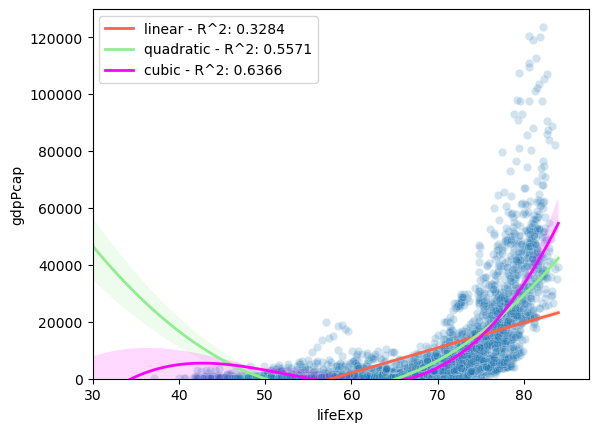

In [99]:
# Scatterplot for lifeExp vs. gdpPcap
sns.scatterplot(data=df_new, x="lifeExp", y="gdpPcap", alpha=0.2)
plt.xlim(30)
plt.ylim(0)

# Iterate through polynomial orders
for order, model, color in zip(orders, models, colors):
    # Fit and plot regression line
    reg_line = np.polyfit(df_new["lifeExp"], df_new["gdpPcap"], deg=order)
    poly = np.poly1d(reg_line)
    label = f'{model} - R^2: {r2_score(df_new["gdpPcap"], poly(df_new["lifeExp"])):.4f}'
    print(poly)
    sns.regplot(data=df_new, x="lifeExp", y="gdpPcap", scatter=False, order=order, line_kws={'linewidth':2}, color=color, label=label)

# Add legend
plt.legend()

# Save and show plot
plt.savefig('scatter2.png')
plt.show()

# Step 4
* Today, we embark on a statistical journey to uncover the intricate connections between health, wealth, and two of the most prevalent health concerns globally: obesity and cardiovascular disease.

* Our adventure begins by exploring our dataset, which spans 187 countries over 27 years. Picture a vast landscape of data, in which each point represents a country's story of health and prosperity over time.

* The heart of our dataset are the sea of variables: country, country code, year, life expectancy, GDP per capita, obesity prevalence, cardiovascular disease prevalence. Notice that life expectancy and GDP per capita fluctuate over time, reflecting the ebb and flow of economic and societal changes.

* But wait, missing data on GDP per capita and life expectancy plagues our dataset! To remedy this, we employ a strategic approach, filling missing values with care and precision, ensuring our analysis remains dependent on time.

* With our data now prepared, we sail into the realm of statistical analysis. The Pearson correlation coefficient guide use through the maze of statistical relationships, uncovering strong correlations between life expectancy and both obesity prevalence and GDP per capita.

* Let's now enjoy some regression graphs modeling our statistical landscape. Mapping life expectancy against obesity prevalence and GDP per capita, we see three ways to fit our data: linear, quadratic, and cubic.

* Through observation and the calculation of R-squared, it becomes clear that the cubic model delivers the deepest insights into the relationship between life expectancy and both obesity prevalence and GDP per capita.

* In conclusion, "Health & Wealth" has unveiled the secrets hidden within our data, illuminating the intricate connections between wealth and two of humanity's greatest challenges—obesity and cardiovascular disease.
